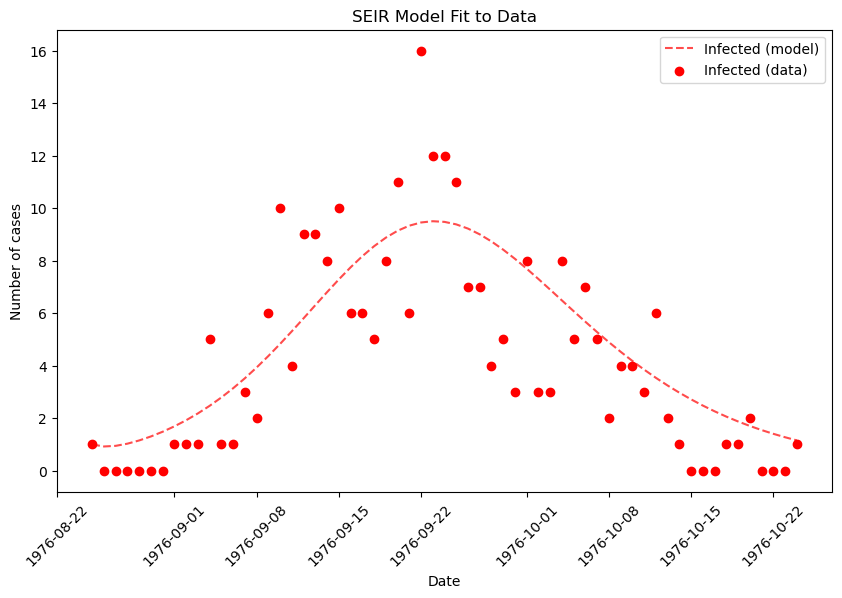

In [4]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Data
data = {
    'date': pd.date_range(start='1976-08-25', periods=61, freq='D'),  # 61 periods to match the number of cases
    'cases': [
        1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 5, 1, 1, 3, 2, 6, 10, 4, 9, 9, 8, 10, 6, 6, 5, 8,
        11, 6, 16, 12, 12, 11, 7, 7, 4, 5, 3, 8, 3, 3, 8, 5, 7, 5, 2, 4, 4, 3, 6, 2, 1,
        0, 0, 0, 1, 1, 2, 0, 0, 0, 1
    ],

}

df = pd.DataFrame(data)

N = 50# Total population (example)
I0 = df['cases'].iloc[0]
E0 = 0  # Assuming initially there are no exposed individuals
R0 = 0  # Initially no one has recovered
S0 = N - I0 - E0 - R0

# SEIR model differential equations
def seir_model(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, E0, I0, R0

# Time grid
t = np.linspace(0, len(df) - 1, len(df))

# Assume some initial beta, sigma, and gamma
beta = 0.4
sigma = 0.4
gamma = 0.15

# Integrate the SEIR equations over the time grid, t
ret = odeint(seir_model, y0, t, args=(N, beta, sigma, gamma))
S, E, I, R = ret.T

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['date'], I, 'r', alpha=0.7, linestyle='dashed', label='Infected (model)')
plt.scatter(df['date'], df['cases'], c='red', label='Infected (data)')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title('SEIR Model Fit to Data')
plt.legend()
plt.xticks(rotation=45)
plt.show()


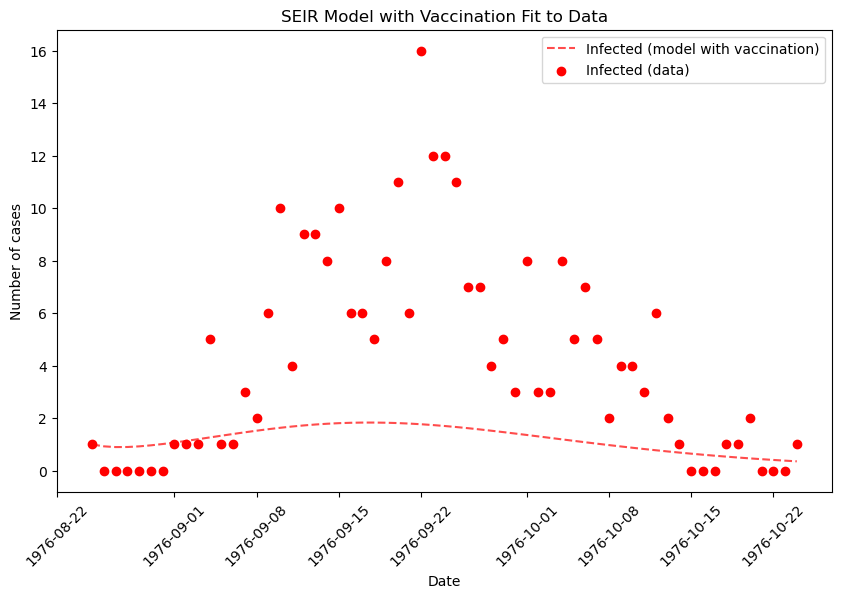

In [14]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Data
data = {
    'date': pd.date_range(start='1976-08-25', periods=61, freq='D'),  # 61 periods to match the number of cases
    'cases': [
        1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 5, 1, 1, 3, 2, 6, 10, 4, 9, 9, 8, 10, 6, 6, 5, 8,
        11, 6, 16, 12, 12, 11, 7, 7, 4, 5, 3, 8, 3, 3, 8, 5, 7, 5, 2, 4, 4, 3, 6, 2, 1,
        0, 0, 0, 1, 1, 2, 0, 0, 0, 1
    ]
}

df = pd.DataFrame(data)
N = 10
I0 = df['cases'].iloc[0]
E0 = 0  # Assuming initially there are no exposed individuals
R0 = 0  # Initially no one has recovered
S0 = N - I0 - E0 - R0

# SEIR model differential equations with vaccination
def seirv_model(y, t, N, beta, sigma, gamma, nu):
    S, E, I, R = y
    dSdt = -beta * S * I / N - nu * S
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I + nu * S
    return dSdt, dEdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, E0, I0, R0

# Time grid
t = np.linspace(0, len(df) - 1, len(df))

# Assume some initial beta, sigma, gamma, and nu (vaccination rate)
beta = 0.3
sigma = 0.2
gamma = 0.1
nu = 0.01# Example vaccination rate

# Integrate the SEIR equations over the time grid, t
ret = odeint(seirv_model, y0, t, args=(N, beta, sigma, gamma, nu))
S, E, I, R = ret.T

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['date'], I, 'r', alpha=0.7, linestyle='dashed', label='Infected (model with vaccination)')
plt.scatter(df['date'], df['cases'], c='red', label='Infected (data)')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title('SEIR Model with Vaccination Fit to Data')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [11]:
len(df)

61

In [12]:
t

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60.])